In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


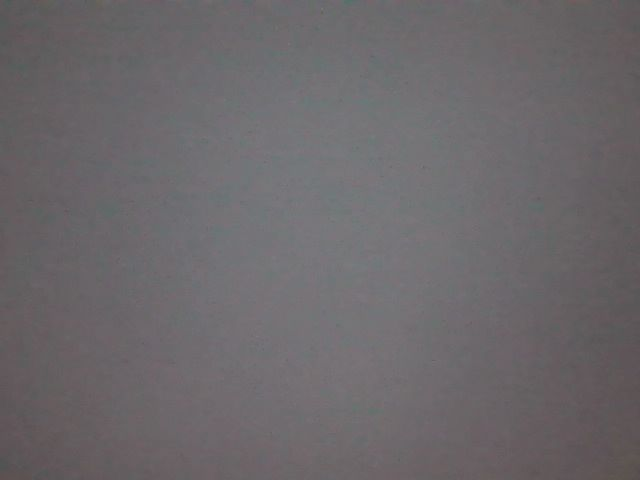

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [ ]:
### CREATE VIRTUAL DISPLAY ###
!apt-get install -y xvfb # Install X Virtual Frame Buffer
import os
os.system('Xvfb :1 -screen 0 1600x1200x16  &')    # create virtual display with size 1600x1200 and 16 bit color. Color can be changed to 24 or 8
os.environ['DISPLAY']=':1.0'    

Reading package lists... Done
Building dependency tree       
Reading state information... Done
xvfb is already the newest version (2:1.19.6-1ubuntu4.10).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


In [ ]:
!pip install pandas==1.3.5

In [ ]:
pip install -r requirements.txt

In [ ]:
pip install numpy

In [ ]:
pip install pandastable

In [ ]:
!unzip Songs

Archive:  Songs.zip
replace songs/angry.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace songs/disgusted.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace songs/fearful.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace songs/happy.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace songs/neutral.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace songs/sad.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace songs/surprised.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [ ]:
pip install spotipy

In [ ]:
import spotipy
import spotipy.oauth2 as oauth2
from spotipy.oauth2 import SpotifyOAuth
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd

auth_manager = SpotifyClientCredentials('ea7595762fe0491a8db21e9f2ed7ccc3','a01e4493d2404c6bb3d82a354e482520')
sp = spotipy.Spotify(auth_manager=auth_manager)

def getTrackIDs(user, playlist_id):
    track_ids = []
    playlist = sp.user_playlist(user, playlist_id)
    for item in playlist['tracks']['items']:
        track = item['track']
        track_ids.append(track['id'])
    return track_ids

def getTrackFeatures(id):
    track_info = sp.track(id)

    name = track_info['name']
    album = track_info['album']['name']
    artist = track_info['album']['artists'][0]['name']
    # release_date = track_info['album']['release_date']
    # length = track_info['duration_ms']
    # popularity = track_info['popularity']

    track_data = [name, album, artist] #, release_date, length, popularity
    return track_data

# Code for creatinf dataframe of feteched playlist

    track_ids = getTrackIDs('spotify',music_dist[show_text[0]])
    track_list = []
    for i in range(len(track_ids)):
       time.sleep(.3)
       track_data = getTrackFeatures(track_ids[i])
       track_list.append(track_data)

    df = pd.DataFrame(track_list, columns = ['Name','Album','Artist']) # ,'Release_date','Length','Popularity'

In [ ]:
pip install tensorflow

In [ ]:
pip install utils

In [ ]:
import tkinter as tk
from tkinter import *
import cv2
from PIL import Image, ImageTk
import os
import numpy as np
import cv2
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D
from tensorflow.keras.optimizers import Adam
from keras.layers import MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from pandastable import Table, TableModel
from spotipy import *
from utils import *
import time

emotion_model = Sequential()
emotion_model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48,48,1)))
emotion_model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Dropout(0.25))
emotion_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Dropout(0.25))
emotion_model.add(Flatten())
emotion_model.add(Dense(1024, activation='relu'))
emotion_model.add(Dropout(0.5))
emotion_model.add(Dense(7, activation='softmax'))
emotion_model.load_weights('model.h5')

cv2.ocl.setUseOpenCL(False)

emotion_dict = {0:"Angry",1:"Disgusted",2:"Fearful",3:"Happy",4:"Neutral",5:"Sad",6:"Surprised"}

music_dist={0:"7LI3zw8HLkjKo5YpvA26KG?si=274ab4cd4cf64401",1:"1n6cpWo9ant4WguEo91KZh?si=617ea1c66ab6446b ",2:"1n6cpWo9ant4WguEo91KZh?si=617ea1c66ab6446b ",3:"1n6cpWo9ant4WguEo91KZh?si=617ea1c66ab6446b ",4:"4kvSlabrnfRCQWfN0MgtgA?si=b36add73b4a74b3a",5:"0deORnapZgrxFY4nsKr9JA?si=7a5aba992ea14c93",6:"1n6cpWo9ant4WguEo91KZh?si=617ea1c66ab6446b "}

global last_frame1                                    
last_frame1 = np.zeros((480, 640, 3), dtype=np.uint8)
global cap1 
show_text=[0]

def web_cam(): 
    global cap1     
    cap1 = WebcamVideoStream(src=0).start()                                
    frame1 = cap1.read()
    frame1 = cv2.resize(frame1,(600,500),fx=0,fy=0, interpolation = cv2.INTER_CUBIC)
    bounding_box = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
    gray_frame = cv2.cvtColor(frame1, cv2.COLOR_BGR2GRAY)
    num_faces = bounding_box.detectMultiScale(gray_frame,scaleFactor=1.3, minNeighbors=5)
    for (x, y, w, h) in num_faces:
        cv2.rectangle(frame1, (x, y-50), (x+w, y+h+10), (255, 0, 0), 2)
        roi_gray_frame = gray_frame[y:y + h, x:x + w]
        cropped_img = np.expand_dims(np.expand_dims(cv2.resize(roi_gray_frame, (48, 48)), -1), 0)
        prediction = emotion_model.predict(cropped_img)
        
        maxindex = int(np.argmax(prediction))
        cv2.putText(frame1, emotion_dict[maxindex], (x+20, y-60), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        show_text[0]=maxindex

    global last_frame1
    last_frame1 = frame1.copy()
    pic = cv2.cvtColor(last_frame1, cv2.COLOR_BGR2RGB)     
    img = Image.fromarray(pic)
    imgtk = ImageTk.PhotoImage(image=img)
    lmain.imgtk = imgtk
    lmain.configure(image=imgtk)
    lmain.after(10, web_cam)
    if cv2.waitKey(1) & 0xFF == ord('q'):
       exit()
       
def music_rec():
    track_ids = getTrackIDs('spotify',music_dist[show_text[0]])
    track_list = []
    for i in range(len(track_ids)):
        time.sleep(.3)
        track_data = getTrackFeatures(track_ids[i])
        track_list.append(track_data)

    df = pd.DataFrame(track_list, columns = ['Name','Album','Artist']) # ,'Release_date','Length','Popularity'
    f = Frame(root)
    f.place(x=1000,y=600)
    f.pack(side=RIGHT, padx=75, pady=150)
    pt = Table(f, dataframe=df)
    pt.show()
    
if __name__ == '__main__':
    root=tk.Tk()   

    heading2=Label(root,text="Emotion Music Recommendation",pady=20, font=('arial',45,'bold'),bg='white',fg='#CDCDCD')                                 
    
    heading2.pack()
    lmain = tk.Label(master=root,padx=50,bd=10)
    lmain2 = tk.Label(master=root,bd=10)
    lmain3=tk.Label(master=root,bd=10,fg="#CDCDCD",bg='black')
    lmain.pack(side=LEFT)
    lmain.place(x=50,y=250)
    lmain3.pack()
    lmain3.place(x=960,y=250)
    lmain2.pack(side=RIGHT)
    lmain2.place(x=900,y=350)
    
    root.title("Music Recommendation")            
    root.geometry("1400x900+100+10") 
    root['bg']='black'
    exitbutton = Button(root, text='Quit',fg="red",command=root.destroy,font=('arial',25,'bold')).pack(side = BOTTOM)
    web_cam()
    music_rec()
    root.mainloop()

error: ignored

In [ ]:
import tkinter as tk
from tkinter import *
import cv2
from PIL import Image, ImageTk
import numpy as np

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow import keras
from pandastable import Table, TableModel
from utils import *
from spotipy import *

emotion_model = keras.Sequential(
    [
        layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape = (48,48,1)),
        layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
        layers.MaxPooling2D(pool_size=(2,2)),
        layers.Dropout(0.25),

        layers.Conv2D(128, kernel_size=(3,3), activation='relu'),
        layers.MaxPooling2D(pool_size=(2,2)),
        layers.Conv2D(128, kernel_size=(3,3), activation='relu'),
        layers.MaxPooling2D(pool_size=(2,2)),
        layers.Dropout(0.25),

        layers.Flatten(),
        layers.Dense(1024, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(7, activation='softmax')

    ]
)

emotion_model.load_weights('model.h5')

cv2.ocl.setUseOpenCL(False)

emotion_dict = {0:"Angry",1:"Disgusted",2:"Fearful",3:"Happy",4:"Neutral",5:"Sad",6:"Surprised"}

music_dist={0:"songs/angry.csv",1:"songs/disgusted.csv ",2:"songs/fearful.csv",3:"songs/happy.csv",4:"songs/neutral.csv",5:"songs/sad.csv",6:"songs/surprised.csv"}

global last_frame1                                    
last_frame1 = np.zeros((480, 640, 3), dtype=np.uint8)
global cap1 
show_text=[0]

def web_cam(): 
    global cap1     
    cap1 = WebcamVideoStream(src=0).start()                                
    frame1 = cap1.read()
    frame1 = cv2.resize(frame1,(600,500),fx=0,fy=0, interpolation = cv2.INTER_CUBIC)
    bounding_box = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
    gray_frame = cv2.cvtColor(frame1, cv2.COLOR_BGR2GRAY)
    num_faces = bounding_box.detectMultiScale(gray_frame,scaleFactor=1.3, minNeighbors=5)
    for (x, y, w, h) in num_faces:
        cv2.rectangle(frame1, (x, y-50), (x+w, y+h+10), (255, 0, 0), 2)
        roi_gray_frame = gray_frame[y:y + h, x:x + w]
        cropped_img = np.expand_dims(np.expand_dims(cv2.resize(roi_gray_frame, (48, 48)), -1), 0)
        prediction = emotion_model.predict(cropped_img)

        maxindex = int(np.argmax(prediction))
        cv2.putText(frame1, emotion_dict[maxindex], (x+20, y-60), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        show_text[0]=maxindex

    global last_frame1
    last_frame1 = frame1.copy()
    pic = cv2.cvtColor(last_frame1, cv2.COLOR_BGR2RGB)     
    img = Image.fromarray(pic)
    imgtk = ImageTk.PhotoImage(image=img)
    lmain.imgtk = imgtk
    lmain.configure(image=imgtk)
    lmain.after(10, web_cam)
    if cv2.waitKey(1) & 0xFF == ord('q'):
       exit()

def music_rec():
    print('---------------- Value ------------', music_dist[show_text[0]])
    df = pd.read_csv(music_dist[show_text[0]])
    f = Frame(root)
    f.place(x=1000,y=600)
    f.pack(side=RIGHT, padx=75, pady=150)
    pt = Table(f, dataframe=df)
    pt.show()

if __name__ == '__main__':
    root=tk.Tk()   

    heading2=Label(root,text="Emotion Music Recommendation",pady=20, font=('arial',45,'bold'),bg='white',fg='#CDCDCD')                                 

    heading2.pack()
    lmain = tk.Label(master=root,padx=50,bd=10)
    lmain2 = tk.Label(master=root,bd=10)
    lmain3=tk.Label(master=root,bd=10,fg="#CDCDCD",bg='black')
    lmain.pack(side=LEFT)
    lmain.place(x=50,y=250)
    lmain3.pack()
    lmain3.place(x=960,y=250)
    lmain2.pack(side=RIGHT)
    lmain2.place(x=900,y=350)

    root.title("Music Recommendation")            
    root.geometry("1400x900+100+10") 
    root['bg']='black'
    exitbutton = Button(root, text='Quit',fg="red",command=root.destroy,font=('arial',25,'bold')).pack(side = BOTTOM)
    web_cam()
    music_rec()
    root.mainloop()

error: ignored

In [ ]:
import cv2
from threading import Thread
class WebcamVideoStream:
    	
		def __init__(self, src=0):
			self.stream = cv2.VideoCapture(src,cv2.CAP_DSHOW)
			(self.grabbed, self.frame) = self.stream.read()
			self.stopped = False

		def start(self):
				# start the thread to read frames from the video stream
			Thread(target=self.update, args=()).start()
			return self
			
		def update(self):
			# keep looping infinitely until the thread is stopped
			while True:
				# if the thread indicator variable is set, stop the thread
				if self.stopped:
					return
				# otherwise, read the next frame from the stream
				(self.grabbed, self.frame) = self.stream.read()

		def read(self):
			# return the frame most recently read
			return self.frame
		def stop(self):
			# indicate that the thread should be stopped
			self.stopped = True